In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import copy
%matplotlib inline

### KNN
Given a positive integer k and a point x0, the KNN classifier first identifies k points in the training data most similar to x0, then estimates the conditional probability of x0 being in class j as the fraction of the k points whose values belong to j. The optimal value for k can be found using cross validation

Step 1: Calculate Euclidean Distance.
The first step is to calculate the distance between two rows in a dataset. We can calculate the straight line distance between two vectors using the Euclidean distance measure. It is calculated as the square root of the sum of the squared differences between the two vectors.


In [10]:
#Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)


# Step 1: Calculate Euclidean Distance. 
# The first step is to calculate the distance between two rows in a dataset. 
# We can calculate the straight line distance between two vectors using the Euclidean distance measure. 
# It is calculated as the square root of the sum of the squared differences between the two vectors.

def euclidean_distance(row1,row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

#Step 2: Get Nearest Neighbors.
#Comparing a query point a in d dimensions against n train- ing examples computes with a runtime of O(nd)
def get_neighbors(train, test_row, num_neighbors):
    distance = []
    for train_row in train:
        dist = euclidean_distance(train_row, test_row)
        distance.append((train_row, dist))
    distance.sort(key = lambda val:val[1])
    print(distance)
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distance[i][0])
    return neighbors

#make classification with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output = [row[-1] for row in neighbors]
    prediction = max(set(output), key = output.count)
    return prediction

In [11]:
# Test distance function
dataset = [[2.7810836,2.550537003,0],
           [1.465489372,2.362125076,0],
           [3.396561688,4.400293529,0],
            [1.38807019,1.850220317,0],
            [3.06407232,3.005305973,0],
            [7.627531214,2.759262235,1],
            [5.332441248,2.088626775,1],
            [6.922596716,1.77106367,1],
            [8.675418651,-0.242068655,1],
            [7.673756466,3.508563011,1]]
prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

[([2.7810836, 2.550537003, 0], 0.0), ([3.06407232, 3.005305973, 0], 0.5356280721938492), ([1.465489372, 2.362125076, 0], 1.3290173915275787), ([1.38807019, 1.850220317, 0], 1.5591439385540549), ([3.396561688, 4.400293529, 0], 1.9494646655653247), ([5.332441248, 2.088626775, 1], 2.592833759950511), ([6.922596716, 1.77106367, 1], 4.214227042632867), ([7.627531214, 2.759262235, 1], 4.850940186986411), ([7.673756466, 3.508563011, 1], 4.985585382449795), ([8.675418651, -0.242068655, 1], 6.522409988228337)]
Expected 0, Got 0.


## K means
1. Choose a K. Randomly assign a number between 1 and K to each observation. These serve as initial cluster assignments
2. Iterate until cluster assignments stop changing
    * (a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in
the kth cluster.
    * (b) Assign each observation to the cluster whose
centroid is closest (where closest is defined us-
ing distance metric).

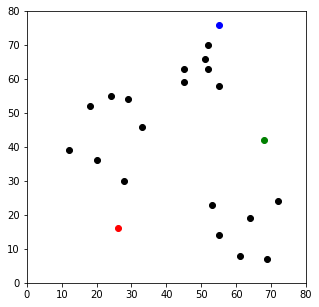

In [16]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [17]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


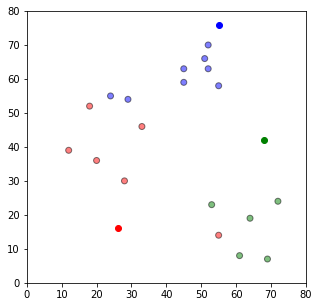

In [22]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

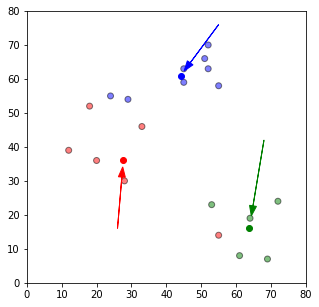

In [23]:
old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

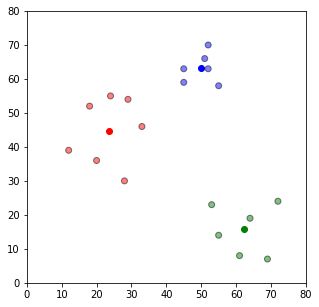

In [24]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

k-means clustering is very sensitive to scale due to its reliance on Euclidean distance so be sure to normalize data if there are likely to be scaling problems.
If there are some symmetries in your data, some of the labels may be mis-labelled
It is recommended to do the same k-means with different initial centroids and take the most common label.

In [50]:
def maxSubArray(nums):
    n = len(nums)
    cur_max = nums[0]
    max_sum = nums[0]
    print(cur_max)
    for i in range(1,n):
        cur_max = max(nums[i], cur_max+nums[i])
        max_sum = max(cur_max, max_sum)
        print([nums[i],cur_max, max_sum])
    return max_sum

In [51]:
a = [-2,1,-3,4,-1,2,1,-5,4]

In [52]:
maxSubArray(a)

-2
[1, 1, 1]
[-3, -2, 1]
[4, 4, 4]
[-1, 3, 4]
[2, 5, 5]
[1, 6, 6]
[-5, 1, 6]
[4, 5, 6]


6